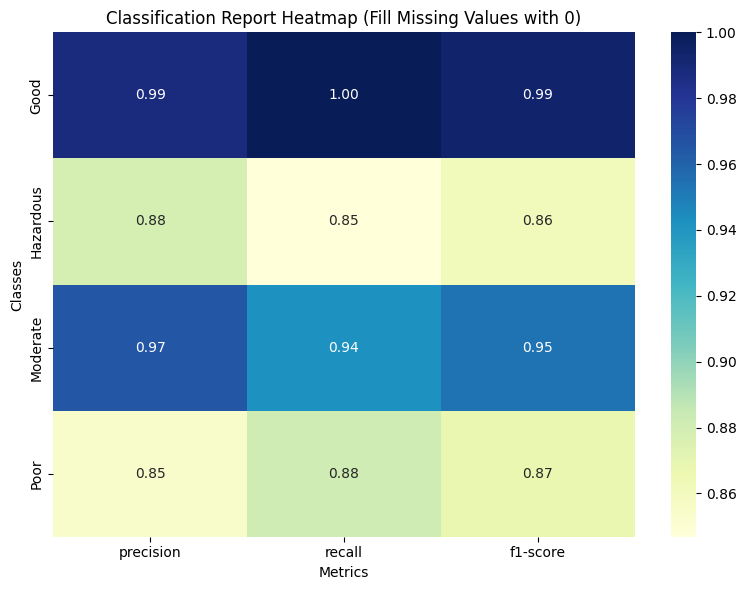

In [15]:
#Classification without pre-processing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the dataset
file_path = '/kaggle/input/my-dataset/pollution_dataset.csv'
data = pd.read_csv(file_path)

# Fill missing values with 0
data_filled = data.fillna(0)

# Define features and target
X = data_filled.drop(columns=['Air Quality'])
y = data_filled['Air Quality']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model and convert the report to a DataFrame
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Filter only class-specific metrics
class_metrics = report_df.iloc[:-3, :]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(class_metrics[['precision', 'recall', 'f1-score']], annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)

# Add labels and title
plt.title("Classification Report Heatmap (Fill Missing Values with 0)")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.tight_layout()
plt.show()


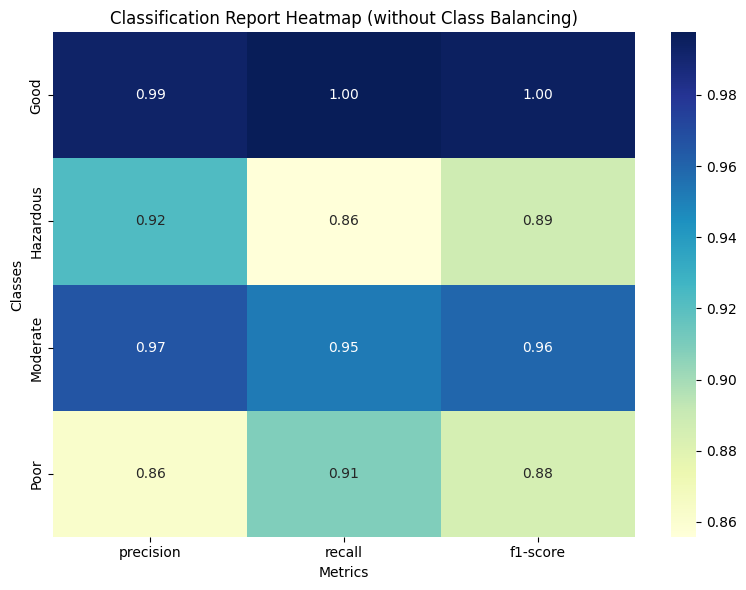

In [16]:
#Classification with pre-processing (without class balancing)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report

# Load the my-dataset
file_path = '/kaggle/input/my-dataset/pollution_dataset.csv'
data = pd.read_csv(file_path)

# Handle missing values
# Fill numeric columns with their mean
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Encode the categorical target variable
label_encoder = LabelEncoder()
data['Air Quality'] = label_encoder.fit_transform(data['Air Quality'])

# Define features and target
X = data.drop(columns=['Air Quality'])
y = data['Air Quality']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Random Forest classifier (without class balancing)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model and convert the report to a DataFrame
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Filter only class-specific metrics
class_metrics = report_df.iloc[:-3, :]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(class_metrics[['precision', 'recall', 'f1-score']], annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)

# Add labels and title
plt.title("Classification Report Heatmap (without Class Balancing)")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.tight_layout()
plt.show()


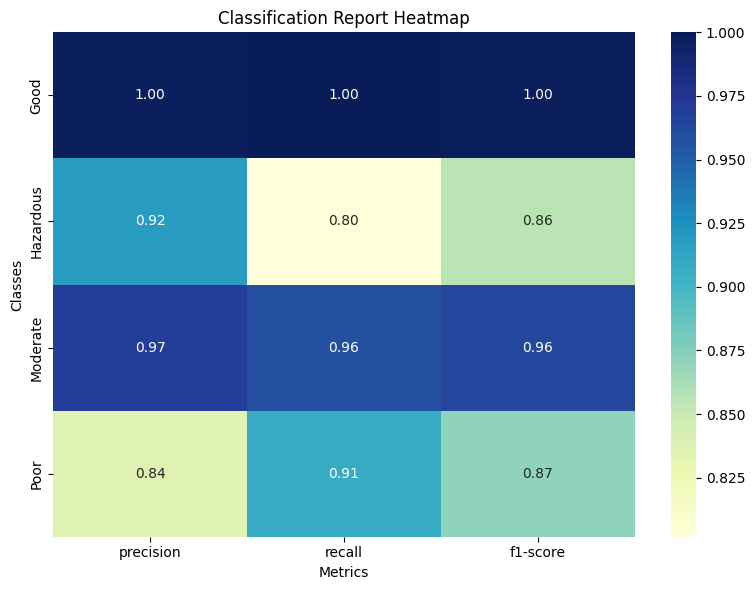

In [17]:
#Classification with pre-processing (with class balancing)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report

# Load the dataset
file_path = '/kaggle/input/my-dataset/pollution_dataset.csv'
data = pd.read_csv(file_path)

# Handle missing values
# Fill numeric columns with their mean
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Encode the categorical target variable
label_encoder = LabelEncoder()
data['Air Quality'] = label_encoder.fit_transform(data['Air Quality'])

# Define features and target
X = data.drop(columns=['Air Quality'])
y = data['Air Quality']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Random Forest classifier with class weights
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Get classification report as a dictionary
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)

# Convert the report to a DataFrame for visualization
report_df = pd.DataFrame(report).transpose()

# Filter only class-specific metrics
class_metrics = report_df.iloc[:-3, :]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(class_metrics[['precision', 'recall', 'f1-score']], annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)

# Add labels and title
plt.title("Classification Report Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.tight_layout()
plt.show()
